In [2]:
import sys
import cv2
from tqdm import tqdm_notebook as tqdm
sys.path.append('D:\API\cocoapi\PythonAPI')  # 你下载的 cocoapi 所在路径
import skimage.io as io
from pycocotools.coco import COCO   # 载入 cocoz
%matplotlib inline

In [23]:
CLASS=['tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad']
coco=COCO("/home/xfr/rssid/data/annotation/annos_rscup_train.json")
ret = {x:[] for x in CLASS}
imgIds = coco.getImgIds()
for imgid in tqdm(imgIds):
    img = coco.loadImgs(imgid)[0]
    area = img['height']*img['width']
    annIds = coco.getAnnIds(imgIds=[imgid], iscrowd=None)
    anns = coco.loadAnns(annIds)
    for ann in anns:
        cls = CLASS[ann['category_id']]
        if(cls == "airport"):
            print(img)
        sub_area = ann['bbox'][2]*ann['bbox'][3]
        ret[cls].append(sub_area/area)
#     I = cv2.imread('/home/xfr/rssid/data/val/images/'+img['file_name'])
#     annIds = coco.getAnnIds(imgIds=[imgid], iscrowd=None)
#     anns = coco.loadAnns(annIds)
#     for ann in anns:
#         poly = np.array(ann["segmentation"][0])
#         xx = poly[0::2]
#         yy = poly[1::2]
#         poly = np.array([[xx[0],yy[0]], [xx[1],yy[1]], [xx[2],yy[2]], [xx[3],yy[3]]])
#         temp = np.array([poly], np.int32)
#         cv2.polylines(I, temp, 1, (0, 255, 0), 1)
#     cv2.imwrite("./original_val/"+img['file_name'], I)

loading annotations into memory...
Done (t=1.21s)
creating index...
index created!


{'license': 1, 'file_name': 'P4577.png', 'coco_url': 'xxx', 'height': 1024, 'width': 1024, 'date_captured': '2019-06-25', 'flickr_url': 'xxx', 'id': 9}
{'license': 1, 'file_name': 'P8329.png', 'coco_url': 'xxx', 'height': 1024, 'width': 1024, 'date_captured': '2019-06-25', 'flickr_url': 'xxx', 'id': 13}
{'license': 1, 'file_name': 'P5702.png', 'coco_url': 'xxx', 'height': 1024, 'width': 1024, 'date_captured': '2019-06-25', 'flickr_url': 'xxx', 'id': 14}
{'license': 1, 'file_name': 'P10600.png', 'coco_url': 'xxx', 'height': 1024, 'width': 1024, 'date_captured': '2019-06-25', 'flickr_url': 'xxx', 'id': 24}
{'license': 1, 'file_name': 'P7376.png', 'coco_url': 'xxx', 'height': 1024, 'width': 1024, 'date_captured': '2019-06-25', 'flickr_url': 'xxx', 'id': 32}
{'license': 1, 'file_name': 'P5797.png', 'coco_url': 'xxx', 'height': 1024, 'width': 1024, 'date_captured': '2019-06-25', 'flickr_url': 'xxx', 'id': 45}
{'license': 1, 'file_name': 'P10943.png', 'coco_url': 'xxx', 'height': 1024, 'widt

In [21]:
import numpy as np

l = len(ret['airport'])
ratios = sorted(np.round(np.array(ret[key]),3))
print(ratios)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001

In [41]:
CLASS=['tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad']
coco=COCO("/home/xfr/rssid/data/annotation/annos_rscup_train.json")
import mmcv
ret = {x:[] for x in CLASS}
imgIds = coco.getImgIds()
info = {}
for imgid in tqdm(imgIds):
    img = coco.loadImgs(imgid)[0]
    origin_img = cv2.imread("/home/xfr/rssid/data/train/images/"+img['file_name'])
    origin_name = img['file_name'].split(".")[0]
    annIds = coco.getAnnIds(imgIds=[imgid], iscrowd=None)
    anns = coco.loadAnns(annIds)
    count = 0
    for ann in anns:
        cls = CLASS[ann['category_id']]
        if(cls == "airport"):
            file_name ="{}_count_{}".format(origin_name, count)+".jpg"
            count += 1
            info[file_name] = {}
            xmin, ymin, w, h = ann["bbox"]
            poly = np.array(ann["segmentation"][0]).reshape(4,2)
            poly -= np.array([xmin, ymin])
            expand_factor = 0.15
            poly += np.array([expand_factor*w, expand_factor*h])
            xmin = max(0, xmin-expand_factor*w)
            ymin = max(0, ymin-expand_factor*h)
            xmax = xmin+(1+expand_factor*2)*w
            ymax = ymin+(1+expand_factor*2)*h
            ann["box"] = [xmin, ymin, xmax-xmin, ymax - ymin]
            info[file_name]["bbox"] = ann["bbox"]
            sub_img = origin_img[int(ymin):int(ymax), int(xmin):int(xmax),:]
            info[file_name]["seg"] = poly
            
            cv2.imwrite("/home/xfr/rssid/airport/"+file_name, sub_img)
mmcv.dump(info, "/home/xfr/rssid/info.pkl")

loading annotations into memory...
Done (t=2.18s)
creating index...
index created!


In [67]:
import matplotlib.pyplot as plt
imgIds = coco.getImgIds()
for imgid in tqdm(imgIds):
    img = coco.loadImgs(imgid)[0]
    I = cv2.imread('/home/xfr/rssid/data/val/images/'+img['file_name'])
    annIds = coco.getAnnIds(imgIds=[imgid], iscrowd=None)
    anns = coco.loadAnns(annIds)
    for ann in anns:
        poly = np.array(ann["segmentation"][0])
        xx = poly[0::2]
        yy = poly[1::2]
        poly = np.array([[xx[0],yy[0]], [xx[1],yy[1]], [xx[2],yy[2]], [xx[3],yy[3]]])
        temp = np.array([poly], np.int32)
        cv2.polylines(I, temp, 1, (0, 255, 0), 1)
    cv2.imwrite("./original_val/"+img['file_name'], I)
    


# for 
# print(annIds)
# 

In [33]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['small-vehicle'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
# imgIds = coco.getImgIds(imgIds=[335328])
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
I = io.imread('/home/xfr/rssid/data/train/images/'+img['file_name'])
plt.imshow(I)
plt.axis('off')
print(img)
annIds = coco.getAnnIds(imgIds=[img['id']], iscrowd=None)
print(len(annIds))
anns = coco.loadAnns(annIds)
for ann in anns:
    bbox = ann['bbox']
    x = [int(x) for x in bbox]
    cv2.rectangle(I, (x[0],x[1]), (x[0]+x[2],x[1]+x[3]), (0,255,0), 2)
    cv2.putText(I, str(ann['category_id']), (x[0],x[1]), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
plt.imshow(I)

[16]


NameError: name 'plt' is not defined

In [26]:
ratios = []
for ann in anns:
    xmin, ymin, w, h = ann['bbox']
    ratio = round(w/h, 1)
    ratios.append(ratio)
l = len(ratios)
ratios.sort()
print(ratios[int(0.05*l)])
print(ratios[int(0.95*l)])
import numpy as np
quantiles = np.arange(0.05, 1.175, 0.225)
for q in quantiles:
    print(ratios[int(q*l)])

In [36]:
import matplotlib.pyplot as plt
CLASS=['tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad']
#CLASS={'tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad'}
coco=COCO("/home/xfr/rssid/data/annotation/annos_rscup_train.json")
class_to_ind = dict(zip(CLASS, range(len(CLASS))))
num_class = dict(zip(CLASS, [0]*len(CLASS)))
imgIds = coco.getImgIds()
max_num = []
for cls in tqdm(CLASS):
    for imgid in imgIds:
        annIds = coco.getAnnIds(imgIds=[imgid], catIds = [class_to_ind[cls]], iscrowd=None)
        num_class[cls] += len(annIds)
        max_num.append(len(annIds))
print(num_class)


# for 
# print(annIds)
# 

loading annotations into memory...
Done (t=2.07s)
creating index...
index created!



{'tennis-court': 2777, 'container-crane': 256, 'storage-tank': 7442, 'baseball-diamond': 692, 'plane': 8533, 'ground-track-field': 498, 'helicopter': 652, 'airport': 306, 'harbor': 6459, 'ship': 40552, 'large-vehicle': 24570, 'swimming-pool': 2379, 'soccer-ball-field': 421, 'roundabout': 657, 'basketball-court': 564, 'bridge': 2497, 'small-vehicle': 169268, 'helipad': 104}


In [5]:
sorted(max_num)[::-1]

[1017,
 869,
 741,
 631,
 626,
 595,
 586,
 586,
 515,
 511,
 510,
 509,
 504,
 497,
 497,
 463,
 429,
 429,
 422,
 412,
 408,
 404,
 395,
 394,
 388,
 386,
 384,
 379,
 378,
 348,
 343,
 340,
 340,
 330,
 325,
 325,
 325,
 312,
 310,
 306,
 301,
 296,
 295,
 287,
 285,
 281,
 276,
 274,
 273,
 272,
 269,
 267,
 265,
 262,
 258,
 251,
 250,
 249,
 248,
 243,
 236,
 235,
 232,
 232,
 230,
 225,
 225,
 224,
 223,
 221,
 220,
 219,
 218,
 217,
 215,
 214,
 212,
 212,
 212,
 209,
 209,
 207,
 204,
 202,
 202,
 199,
 199,
 199,
 199,
 197,
 197,
 197,
 197,
 196,
 195,
 194,
 193,
 191,
 190,
 188,
 188,
 187,
 185,
 185,
 184,
 182,
 178,
 177,
 176,
 175,
 175,
 175,
 173,
 171,
 170,
 168,
 167,
 167,
 166,
 166,
 166,
 165,
 165,
 165,
 165,
 163,
 163,
 162,
 162,
 161,
 160,
 160,
 158,
 158,
 158,
 155,
 155,
 155,
 154,
 153,
 153,
 153,
 152,
 152,
 151,
 151,
 150,
 150,
 149,
 149,
 149,
 148,
 147,
 146,
 145,
 145,
 145,
 145,
 144,
 144,
 144,
 143,
 143,
 143,
 142,
 141,
 14

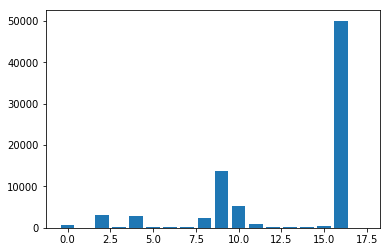

In [110]:
x = list(num_class.keys())
y = list(num_class.values())
plt.bar(range(len(y)), y)
plt.show()

In [103]:
np.sum(np.array([list(num_class.values())]))

81048